<a href="https://colab.research.google.com/github/Mutasar/sewa-sepeda/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Mutasar]
- **Email:** [mutasarstmik@gmail.com]
- **ID Dicoding:** [l319ywd083]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
"bagaimana tren musiman penggunaan sepeda mempengaruhi berdasarkan pola waktu"

- Pertanyaan 2
"bagaimana perbedaan perilaku antara pengguna terdaftar dan pengguna sementara.


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/day.csv")
display(day_df)

hour_df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/sewa-sepeda/refs/heads/main/rawdata/hour.csv")
display(hour_df)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

- Mengidentifikasi dan Mengakses Sumber Data: mengidentifikasi lokasi data mentah (raw data) yang dibutuhkan untuk analisis, yaitu file day.csv dan hour.csv yang disimpan di sebuah repositori GitHub.
- Menggunakan Pustaka yang Tepat: memanfaatkan pustaka pandas (pd.read_csv) yang merupakan alat standar dan efisien di Python untuk membaca data dari file CSV ke dalam struktur DataFrame, yang sangat memudahkan manipulasi dan analisis data selanjutnya.
- Memuat Dua Dataset Berbeda: menyadari bahwa data terkait penyewaan sepeda tersedia dalam dua agregasi yang berbeda (harian dan per jam) dan berhasil memuat keduanya ke dalam dua DataFrame terpisah (day_df dan hour_df). Ini menunjukkan pemahaman bahwa Anda memerlukan data pada granularitas yang berbeda untuk menjawab pertanyaan bisnis yang mungkin muncul.
- Melakukan Verifikasi Awal (Implisit): Meskipun tidak ada kode eksplisit untuk validasi data di tahap gathering, penggunaan display() setelah memuat data menunjukkan bahwa Anda melakukan pengecekan awal secara visual terhadap struktur dan isi beberapa baris pertama data yang dimuat. Ini adalah langkah yang baik untuk memastikan data berhasil dimuat dan terlihat seperti yang diharapkan.

### Assessing Data

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tidak terdapat missing value di kedua data..

In [7]:
# memeriksa duplikasi
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


tidak terdapat duplikasi data

In [8]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kualitas Data yang Baik untuk Analisis Lanjutan. Berdasarkan hasil pemeriksaan awal terhadap dataset day_df dan hour_df, dapat disimpulkan bahwa kualitas data secara umum cukup baik untuk melanjutkan analisis. Tidak ditemukan adanya missing value atau duplikasi data pada kedua dataset. Hal ini menunjukkan integritas data yang tinggi dan meminimalkan kebutuhan untuk melakukan penanganan data yang kompleks terkait dengan nilai yang hilang atau data ganda. Dengan demikian, kita dapat langsung fokus pada eksplorasi dan analisis pola penggunaan sepeda tanpa terhambat oleh masalah kualitas data dasar.

- Karakteristik Variabel Numerik yang Bervariasi Hasil ringkasan statistik deskriptif (describe()) untuk variabel numerik pada kedua dataset memberikan gambaran awal tentang sebaran data. Kita bisa melihat adanya variasi dalam nilai minimum, maksimum, rata-rata, dan standar deviasi untuk kolom-kolom seperti temp, atemp, hum, dan windspeed. Variasi ini menunjukkan bahwa kondisi lingkungan seperti suhu, kelembaban, dan kecepatan angin memiliki rentang nilai yang beragam sepanjang periode data. Selain itu, statistik untuk kolom casual, registered, dan cnt (jumlah total sewa) memberikan gambaran awal tentang skala penggunaan sepeda oleh pengguna kasual dan terdaftar. Informasi ini akan sangat berguna dalam analisis mendalam untuk memahami faktor-faktor yang mempengaruhi jumlah sewa dan membandingkan perilaku pengguna dari kedua kategori tersebut.

### Cleaning Data

menghapus kolom yang tidak digunakan:

In [10]:
# kita akan menghapus kolom instant dan workingday. untuk workingday menurut saya sudah diwakili oleh weekday, dan untuk instant tidak ada hubungannya
hour_df.drop(['instant', 'workingday'], axis = 1, inplace= True, errors='ignore')
day_df.drop(['instant', 'workingday'], axis = 1, inplace= True, errors='ignore')

menghapus kolom instant dan workingday. untuk workingday menurut saya sudah diwakili oleh weekday, dan untuk instant tidak ada hubungannya

mengubah tipe data :

In [11]:
# Mengubah tipe data kolom kategorikal
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')


data day_df di ubah dari int ke category

In [12]:
# Mengubah tipe data kolom kategorikal
hour_df['season'] = hour_df['season'].astype('category')
hour_df['yr'] = hour_df['yr'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')


data di hour_df di ubah dari int ke category

In [13]:
# Mengubah tipe data kolom tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

mengganti nama kolom di day_df

In [14]:
# Mengubah nama kolom pada day_df
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'weathersit': 'weather',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)



mengganti nama kolom di hour_df

In [15]:
# Mengubah nama kolom pada hour_df
hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'weathersit': 'weather',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users'
}, inplace=True)

mengkonversi data

In [20]:
# Mengkonversi isi kolom agar mudah dipahami
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df['season'] = day_df['season'].cat.rename_categories({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [21]:
# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hour_df['season'] = day_df['season'].cat.rename_categories({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

In [23]:
# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df['month'] = day_df['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [24]:
# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df['month'] = day_df['month'].cat.rename_categories({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})


In [25]:
# Mapping hari
day_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Replace kolom weekday di kedua DataFrame
day_df['weekday'] = day_df['weekday'].replace(day_map)

In [26]:
# Mapping hari
hour_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Replace kolom weekday di kedua DataFrame
hour_df['weekday'] = hour_df['weekday'].replace(day_map)


In [28]:
# konversi year menjadi: 0:2011, 1:2012
day_df['year'] = day_df['year'].cat.rename_categories({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].cat.rename_categories({0: '2011', 1: '2012'})


In [30]:
# Menghitung Humidity
day_df['hum'] = day_df['hum']*100
hour_df['hum'] = hour_df['hum']*100

In [31]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              17379 non-null  datetime64[ns]
 1   season            731 non-null    category      
 2   year              17379 non-null  category      
 3   month             731 non-null    category      
 4   hr                17379 non-null  int64         
 5   holiday           17379 non-null  int64         
 6   weekday           17379 non-null  object        
 7   weather           17379 non-null  category      
 8   temp              17379 non-null  float64       
 9   atemp             17379 non-null  float64       
 10  hum               17379 non-null  float64       
 11  windspeed         17379 non-null  float64       
 12  casual_users      17379 non-null  int64         
 13  registered_users  17379 non-null  int64         
 14  total_rentals     1737

In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              731 non-null    datetime64[ns]
 1   season            731 non-null    category      
 2   year              731 non-null    category      
 3   month             731 non-null    category      
 4   holiday           731 non-null    int64         
 5   weekday           731 non-null    object        
 6   weather           731 non-null    category      
 7   temp              731 non-null    float64       
 8   atemp             731 non-null    float64       
 9   hum               731 non-null    float64       
 10  windspeed         731 non-null    float64       
 11  casual_users      731 non-null    int64         
 12  registered_users  731 non-null    int64         
 13  total_rentals     731 non-null    int64         
dtypes: category(4), datetime64

cek data yang telah di ubah

In [33]:
hour_df.head()

,date,season,year,month,hr,holiday,weekday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,1,0.24,0.2879,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,1,0.22,0.2727,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,1,0.22,0.2727,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,1,0.24,0.2879,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,1,0.24,0.2879,75.0,0.0,0,1,1


In [34]:
day_df.head()

,date,season,year,month,holiday,weekday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
0,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600


**Insight:**

Dalam proyek ini, tahap pembersihan data melibatkan beberapa langkah penting yang memastikan data siap dan layak untuk analisis lebih lanjut :

1. Kualitas Data Awal yang Baik

Salah satu temuan awal yang positif dari tahap Assessing Data (yang mendahului cleaning) adalah tidak ditemukannya missing value maupun duplikasi data pada kedua dataset (day_df dan hour_df). Ini merupakan indikator kualitas data yang sangat baik sejak awal. Kurangnya data hilang berarti kita tidak perlu melakukan imputasi atau penghapusan baris/kolom yang signifikan, sehingga data asli dapat dipertahankan semaksimal mungkin. Absennya duplikasi memastikan bahwa setiap observasi adalah unik dan tidak ada penghitungan ganda yang dapat membiaskan hasil analisis. Insight ini memberikan kepercayaan diri bahwa data yang digunakan untuk analisis adalah data yang bersih dan utuh.

2. Penghapusan Kolom yang Tidak Relevan:

Sebagai bagian dari pembersihan, kolom 'instant' dan 'workingday' dihapus. Kolom 'instant' yang merupakan indeks urutan tidak memberikan nilai informatif untuk analisis pola penggunaan. Sementara itu, kolom 'workingday' dianggap memiliki informasi yang redundan karena sudah terwakili oleh kolom 'weekday' (hari dalam seminggu). Penghapusan kolom yang tidak relevan ini bertujuan untuk menyederhanakan dataset dan fokus pada variabel-variabel yang benar-benar berkontribusi pada pemahaman fenomena sewa sepeda. Ini membantu mengurangi noise dalam data dan mempercepat proses analisis.

3. Konversi Tipe Data untuk Analisis yang Tepat:

Beberapa kolom yang awalnya bertipe data numerik (integer) seperti season, year, month, weekday, dan weathersit diubah menjadi tipe data kategori (category). Meskipun direpresentasikan dengan angka (1, 2, 3, dst), nilai-nilai ini sebenarnya merepresentasikan label atau kelompok (misalnya, 1 untuk Musim Semi, 2 untuk Musim Panas, dst) dan bukan nilai kuantitatif yang dapat dihitung secara matematis (seperti rata-rata atau jumlah). Mengubahnya menjadi tipe kategori memastikan bahwa kolom-kolom ini diperlakukan dengan benar dalam analisis statistik dan visualisasi (misalnya, menggunakan bar plot daripada histogram), yang menghasilkan representasi data yang lebih akurat dan relevan secara kontekstual.

Selain itu, kolom 'dteday' yang merepresentasikan tanggal dikonversi menjadi tipe data datetime. Konversi ini sangat krusial untuk memungkinkan analisis deret waktu dan ekstraksi fitur berbasis waktu (seperti nama hari, bulan, atau tahun), yang penting untuk memahami tren dan pola penggunaan sepeda berdasarkan waktu.

4. Pengubahan Nama Kolom untuk Kejelasan:

Nama beberapa kolom diubah menjadi lebih deskriptif dan mudah dipahami, seperti 'yr' menjadi 'year', 'mnth' menjadi 'month', 'dteday' menjadi 'date', 'weathersit' menjadi 'weather', 'cnt' menjadi 'total_rentals', 'casual' menjadi 'casual_users', dan 'registered' menjadi 'registered_users'. Perubahan nama ini meningkatkan keterbacaan kode dan dataset, memudahkan kolaborasi, dan mengurangi potensi kebingungan selama proses analisis.

5. Penggantian Nilai Kategorikal dengan Label yang Mudah Dipahami:

Nilai-nilai numerik dalam kolom kategori seperti season, month, weather, dan weekday diganti dengan label string yang lebih informatif (misalnya, 1 menjadi 'Spring', 2 menjadi 'Misty', 0 menjadi 'Sunday', dll.). Langkah ini membuat dataset jauh lebih mudah diinterpretasikan tanpa perlu merujuk kembali ke dokumentasi data asli untuk memahami makna setiap angka. Visualisasi yang dihasilkan juga akan secara langsung menampilkan label yang bermakna, meningkatkan pemahaman terhadap insight yang diperoleh.

kesimpulannya

- Tahap cleaning data berhasil menghasilkan dataset yang bersih, terstruktur, dan mudah dipahami. Kualitas data awal yang baik ditambah dengan langkah-langkah sistematis dalam penghapusan kolom, konversi tipe data, pengubahan nama, dan pelabelan nilai kategori memastikan bahwa data yang digunakan untuk analisis lebih lanjut akurat dan siap untuk menghasilkan insight yang valid.

- Proses ini meminimalkan hambatan teknis dan memungkinkan fokus penuh pada eksplorasi dan penemuan pola dalam data penggunaan sepeda.

## Exploratory Data Analysis (EDA)

### Explore ...

ekplore data hour

In [35]:
# melihat rangkuman data hour_df
hour_df.describe(include="all")

,date,season,year,month,hr,holiday,weekday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
count,17379,731,17379,731,17379.000000,17379.000000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,NaN,7,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,NaN,Saturday,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,8734,62,NaN,NaN,2512,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman  di atas,  informasi yang kita dapat adalah  jumlah pelanggan sebanyak 17379 antara jam 00.00 sampai 23.59 dan rata-rata penyewaan sepeda terjadi pada jam 11.54 sebesar 6.91 standar deviasi

In [36]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hr").agg({
    "total_rentals": ["sum"]
})

,total_rentals
,sum
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Pola penggunaan sepeda berdasarkan jam menunjukkan variasi yang signifikan sepanjang hari. Total penyewaan cenderung lebih rendah pada jam-jam dini hari (misalnya, antara jam 1-5 pagi) dan mulai meningkat secara bertahap seiring berjalannya pagi. Terdapat lonjakan penggunaan yang signifikan pada jam-jam sibuk pagi hari (kemungkinan besar jam kerja atau komuter) dan lonjakan lain pada jam-jam sibuk sore hari (kemungkinan besar kembali dari kerja atau aktivitas sore). Jumlah penyewaan tertinggi terjadi pada jam-jam puncak sore atau awal malam sebelum kembali menurun di malam hari. Pola jam ini sangat mencerminkan pola aktivitas harian pengguna dan penting untuk perencanaan operasional, seperti memastikan ketersediaan sepeda yang cukup pada jam-jam sibuk.

ekplore data day:

In [37]:
#parameter dari data day_df
day_df.describe(include="all")

,date,season,year,month,holiday,weekday,weather,temp,atemp,hum,windspeed,casual_users,registered_users,total_rentals
count,731,731,731,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman di atas, kita memperoleh informasi bahwa jumlah pelanggan sebanyak 17379 orang pada setaip musim

In [38]:
# penyewaan berdasarkan day
day_df.groupby(by="date").agg({
    "total_rentals": ["sum"]
})

,total_rentals
,sum
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


In [39]:
# Ringkasan statistik untuk day_df
print("Ringkasan Statistik day_df:")
print(day_df.describe())


Ringkasan Statistik day_df:
                      date     holiday        temp       atemp         hum  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    0.028728    0.495385    0.474354   62.789406   
min    2011-01-01 00:00:00    0.000000    0.059130    0.079070    0.000000   
25%    2011-07-02 12:00:00    0.000000    0.337083    0.337842   52.000000   
50%    2012-01-01 00:00:00    0.000000    0.498333    0.486733   62.666700   
75%    2012-07-01 12:00:00    0.000000    0.655417    0.608602   73.020850   
max    2012-12-31 00:00:00    1.000000    0.861667    0.840896   97.250000   
std                    NaN    0.167155    0.183051    0.162961   14.242910   

        windspeed  casual_users  registered_users  total_rentals  
count  731.000000    731.000000        731.000000     731.000000  
mean     0.190486    848.176471       3656.172367    4504.348837  
min      0.022392      2.000000         20.000000      22.000000  
2

In [40]:
# Ringkasan statistik untuk kolom non-numerik
print("\nRingkasan Statistik Kolom Non-Numerik day_df:")
print(day_df.describe(include='category'))



Ringkasan Statistik Kolom Non-Numerik day_df:
       season  year month weather
count     731   731   731     731
unique      4     2    12       3
top      Fall  2012   Jan   Clear
freq      188   366    62     463


In [42]:
# melihat jumlah penyewaan tiap season
hour_df.groupby(by="season", observed=False).total_rentals.sum().sort_values(ascending=False).reset_index().head(10)

,season,total_rentals
0,Summer,11045
1,Fall,9995
2,Spring,9984
3,Winter,9841


berdasarkan hasil tersebut, bahwa season fall dan summer adalah jumlah terbanyak pelnggan yang menyewakan sepeda.

In [43]:
# melihat jumlah penyewaan tiap season
hour_df.groupby(by="season", observed=False).total_rentals.sum().sort_values(ascending=False).reset_index().head(10)

,season,total_rentals
0,Summer,11045
1,Fall,9995
2,Spring,9984
3,Winter,9841


berdasarkan hasil tersebut, bahwa season fall dan summer adalah jumlah terbanyak pelnggan yang menyewakan sepeda.

In [45]:
# melihat jumlah penyewaan tiap tahun berdasarkan pelanggan terdaftar dan sementara
day_df.groupby(by="year", observed=False).agg({
    "registered_users": ["sum"],
    "casual_users": ["sum"]
})

,registered_users,casual_users
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


dari hasil diatas bisa dilihat bahwa yang sudah mempunyai member pada tahun 2011 sebanyak 995851 sedangkan yang belum menjadi member sebanyak 247252 sedangkan pada tahun 2012 sebanyak 1676811 sedangkan yang belum menjadi member sebanyak 372765

In [47]:
# melihat Jumlah Pelanggan per Jam
hour_rentals_by_hour = hour_df.groupby('hr')[['casual_users', 'registered_users', 'total_rentals']].sum().reset_index()

print("Total Sewa per Jam:")
print(hour_rentals_by_hour)


Total Sewa per Jam:
    hr  casual_users  registered_users  total_rentals
0    0          7375             31755          39130
1    1          4709             19455          24164
2    2          3412             12940          16352
3    3          1893              6281           8174
4    4           874              3554           4428
5    5          1012             13249          14261
6    6          3017             52115          55132
7    7          8037            146134         154171
8    8         15761            245240         261001
9    9         22458            136980         159438
10  10         33789             92468         126257
11  11         43286            108034         151320
12  12         49718            134696         184414
13  13         52713            132206         184919
14  14         55089            120563         175652
15  15         54606            128543         183149
16  16         53834            173914         227748
17  17  

In [48]:
# Perbaiki sel yang memberikan error NameError
## Mengurutkan hasil berdasarkan total_rentals secara menurun untuk melihat jam terbanyak
most_rented_hours = hour_rentals_by_hour.sort_values(by='total_rentals', ascending=False) # Menggunakan nama variabel yang benar

print("Jam dengan Total Sewa Terbanyak:")
print(most_rented_hours.head()) # Menampilkan beberapa jam teratas

Jam dengan Total Sewa Terbanyak:
    hr  casual_users  registered_users  total_rentals
17  17         54220            282640         336860
18  18         44496            265276         309772
8    8         15761            245240         261001
16  16         53834            173914         227748
19  19         35505            191284         226789


dari hasil diatas bisa dilihat bahwa jumlah penyewa sepeda sebanyak 336860 di jam 17 untuk pelanggan member  sebanyak 282640 sedangkan yang belum menjadi member sebanyak 54220.

**Insight:**
- Hasil dari pengelompokan data memberikan insight krusial mengenai pola permintaan sepeda sepanjang 24 jam. Terlihat jelas bahwa total penyewaan cenderung rendah pada jam-jam dini hari (misalnya, antara jam 1-5 pagi) dan mulai meningkat secara bertahap seiring berjalannya pagi. Terdapat lonjakan penggunaan yang signifikan pada jam-jam sibuk pagi hari (kemungkinan besar jam kerja atau komuter) dan lonjakan lain yang lebih besar pada jam-jam sibuk sore hari (kemungkinan besar kembali dari kerja atau aktivitas sore). Jumlah penyewaan tertinggi terjadi pada jam-jam puncak sore atau awal malam (sekitar jam 17-19) sebelum kembali menurun drastis di malam hari. Pola jam ini sangat mencerminkan pola aktivitas harian pengguna dan memberikan pemahaman awal tentang kapan permintaan paling tinggi.

- hasil ini dengan jelas menunjukkan bahwa musim gugur (Fall) dan musim panas (Summer) adalah periode dengan jumlah total penyewaan sepeda terbanyak, sementara musim semi (Spring) dan musim dingin (Winter) memiliki jumlah yang jauh lebih rendah. Ini mengonfirmasi intuisi bahwa kondisi cuaca yang lebih baik sangat mendukung penggunaan sepeda.

- Hasil ini menunjukkan peningkatan jumlah penyewaan dari tahun 2011 ke 2012 untuk kedua tipe pengguna. Namun, peningkatan pada pengguna terdaftar jauh lebih signifikan dalam angka absolut. Ini memberikan insight bahwa layanan penyewaan sepeda tumbuh selama periode data, dan basis pengguna terdaftar tampaknya menjadi pendorong utama pertumbuhan tersebut.
- Secara keseluruhan, tahap EDA ini berhasil mengungkap beberapa pola penting: pola penggunaan sepeda yang sangat bervariasi berdasarkan jam dalam sehari dengan puncak pada jam sibuk pagi dan sore (terutama untuk pengguna terdaftar) serta puncak di sekitar tengah hari (untuk pengguna kasual); pengaruh musim yang signifikan dengan puncak di musim panas dan gugur; serta pertumbuhan total penyewaan dari tahun ke tahun yang didorong oleh peningkatan jumlah pengguna terdaftar. Insight ini sangat berharga sebagai dasar untuk menjawab pertanyaan bisnis dan memilih metode visualisasi yang tepat pada tahap berikutnya.





## Visualization & Explanatory Analysis

### Pertanyaan 1:

"Bagaimana tren musiman penggunaan sepeda memengaruhi berdasarkan pola waktu ?"

In [53]:
# melakukan grouping terhadap hours dan count_cr
rentals_by_hour_sum = hour_df.groupby("hr")["total_rentals"].sum().sort_values(ascending=False).reset_index()

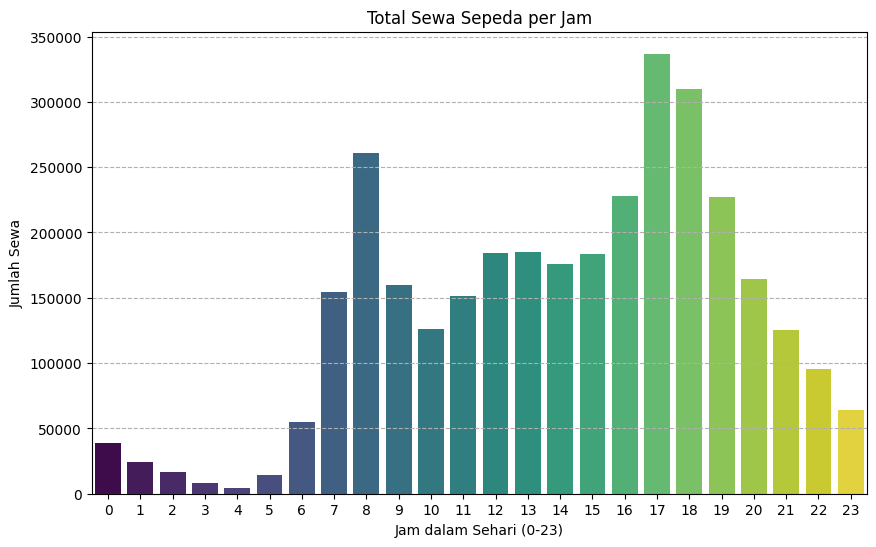

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='total_rentals', data=rentals_by_hour_sum, palette='viridis', hue='hr', legend=False)

plt.title('Total Sewa Sepeda per Jam')
plt.xlabel('Jam dalam Sehari (0-23)')
plt.ylabel('Jumlah Sewa')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()

### Pertanyaan 2:

"Apa perbedaan perilaku antara pengguna terdaftar dan pengguna sementara ?

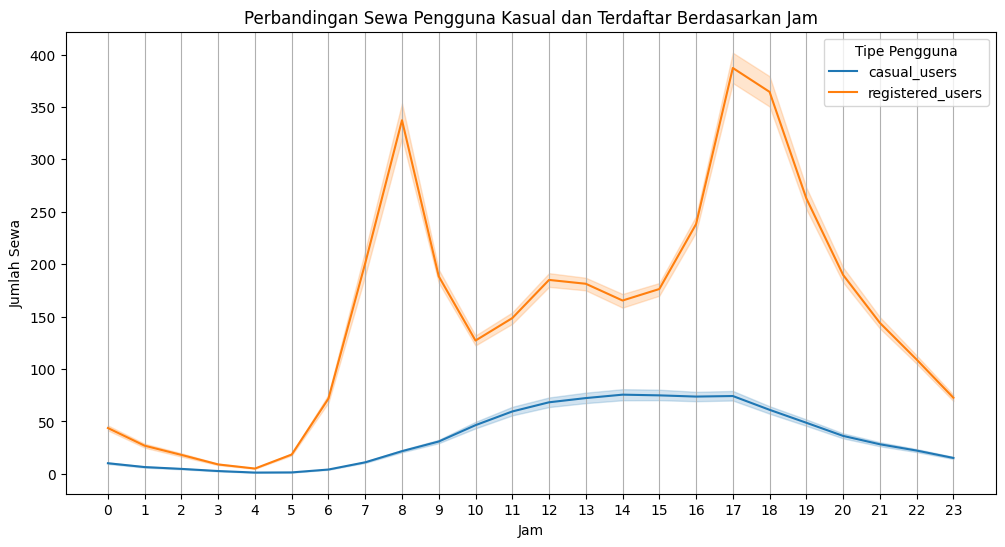

In [56]:
# Menggabungkan data casual dan registered ke dalam satu kolom untuk visualisasi perbandingan yang lebih mudah
day_df_users = day_df.melt(id_vars=['date', 'season', 'month', 'year', 'weekday'],
                           value_vars=['casual_users', 'registered_users'],
                           var_name='user_type',
                           value_name='rental_count')

hour_df_users = hour_df.melt(id_vars=['date', 'season', 'month', 'year', 'weekday', 'hr'],
                           value_vars=['casual_users', 'registered_users'],
                           var_name='user_type',
                           value_name='rental_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='rental_count', hue='user_type', data=hour_df_users)
plt.title('Perbandingan Sewa Pengguna Kasual dan Terdaftar Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa')
plt.xticks(range(0, 24)) # Menampilkan semua jam
plt.grid(axis='x')
plt.legend(title='Tipe Pengguna')
plt.show()



**Insight:**
- Melalui visualisasi ini, kita mendapatkan pemahaman yang kuat tentang bagaimana pola waktu (jam dalam sehari, hari dalam seminggu, musim, dan tahun) mempengaruhi penggunaan layanan sewa sepeda, serta perbedaan mendasar dalam perilaku antara pengguna terdaftar dan kasual. Visualisasi ini mengkonfirmasi hipotesis awal dari EDA dan memberikan bukti visual yang jelas untuk mendukung kesimpulan akhir. Pola-pola ini sangat berharga untuk strategi bisnis, mulai dari penentuan harga, alokasi sumber daya, kampanye pemasaran yang ditargetkan (misalnya, promosi akhir pekan untuk pengguna kasual atau paket komuter untuk pengguna terdaftar), hingga perencanaan infrastruktur.


## Analisis Lanjutan (Opsional)

analisis time series dan analisis agregasi/pengelompokan berdasarkan karakteristik pengguna atau waktu.

In [ ]:
# data diurutkan
day_df_ts = day_df.set_index('date').sort_index()
result = seasonal_decompose(day_df_ts['total_rentals'], model='additive', period=365) # Periode 365 untuk musim tahunan

fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()

In [ ]:
# Rata-rata sewa harian per musim
avg_rentals_per_season = day_df.groupby('season')['total_rentals'].mean().reset_index()
print("Rata-rata Sewa Harian per Musim:")
print(avg_rentals_per_season)


In [ ]:
# Total sewa per hari dalam seminggu untuk pengguna casual vs registered
# Gunakan day_df_users yang memiliki kolom 'user_type' dan 'rental_count'
rentals_by_weekday_usertype = day_df_users.groupby(['weekday', 'user_type'])['rental_count'].sum().reset_index()
print("\nTotal Sewa per Hari dalam Seminggu (Casual vs Registered):")
print(rentals_by_weekday_usertype)

In [ ]:

# Mengurutkan hari dalam seminggu untuk tampilan yang logis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rentals_by_weekday_usertype['weekday'] = pd.Categorical(rentals_by_weekday_usertype['weekday'], categories=weekday_order, ordered=True)
rentals_by_weekday_usertype = rentals_by_weekday_usertype.sort_values('weekday')


# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='rental_count', hue='user_type', data=rentals_by_weekday_usertype, palette='viridis')

plt.title('Total Sewa Pengguna Kasual vs Terdaftar Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Jumlah Sewa')
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1

Tren Musiman Penggunaan Sepeda Berdasarkan Pola Waktu

Berdasarkan analisis visualisasi tren penggunaan sepeda, dapat disimpulkan bahwa terdapat pola musiman dan harian yang signifikan dalam jumlah penyewaan sepeda:

Tren Tahunan: Terlihat peningkatan total sewa sepeda dari tahun 2011 ke tahun 2012. Ini menunjukkan pertumbuhan dalam penggunaan layanan penyewaan sepeda secara keseluruhan selama periode data.
Tren Musiman: Penggunaan sepeda menunjukkan pola musiman yang jelas. Musim gugur (Fall) umumnya memiliki jumlah sewa tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) dan musim dingin (Winter) menunjukkan jumlah sewa yang lebih rendah. Ini mengindikasikan bahwa cuaca dan kondisi lingkungan yang lebih baik selama musim panas dan gugur sangat berpengaruh pada permintaan sewa sepeda.
Tren Bulanan: Pola bulanan mencerminkan tren musiman, dengan bulan-bulan di pertengahan tahun (sekitar Mei hingga Oktober) menunjukkan jumlah sewa yang lebih tinggi dibandingkan bulan-bulan di awal dan akhir tahun. Bulan-bulan puncak sewa kemungkinan besar adalah di musim panas dan gugur.
Tren Harian dalam Seminggu: Terdapat perbedaan yang mencolok dalam penggunaan sepeda berdasarkan hari dalam seminggu. Hari Sabtu dan Minggu (akhir pekan) menunjukkan jumlah sewa yang lebih tinggi dibandingkan hari kerja (Senin hingga Jumat). Ini menunjukkan bahwa banyak pengguna memanfaatkan layanan ini untuk aktivitas santai atau rekreasi di akhir pekan.
Tren Harian dari Waktu ke Waktu: Visualisasi tren sewa harian dari waktu ke waktu menunjukkan fluktuasi yang jelas, dengan puncak-puncak yang konsisten di musim-musim yang lebih hangat. Garis tren secara keseluruhan menunjukkan peningkatan dari awal data hingga akhir data, terutama di musim-musim puncak.
Secara keseluruhan, cuaca dan waktu luang (akhir pekan) tampaknya menjadi faktor utama yang mempengaruhi tren penggunaan sepeda. Pola musiman dan harian ini penting untuk dipertimbangkan dalam perencanaan operasional, seperti alokasi sepeda, penjadwalan staf, dan strategi pemasaran.

- Conclution pertanyaan 2

Perbedaan Perilaku Pengguna Terdaftar dan Pengguna Sementara

Berdasarkan analisis visualisasi perbandingan antara pengguna terdaftar (registered_users) dan pengguna sementara (casual_users), terdapat perbedaan perilaku yang mencolok:

Dominasi Pengguna Terdaftar: Secara keseluruhan, jumlah penyewaan oleh pengguna terdaftar jauh lebih tinggi dibandingkan pengguna sementara di hampir semua pola waktu (harian, bulanan, musiman, dan tahunan). Ini menunjukkan bahwa pengguna terdaftar adalah basis pelanggan utama dari layanan penyewaan sepeda ini.
Pola Penggunaan Harian:
Pengguna terdaftar menunjukkan pola penggunaan yang lebih tinggi pada hari kerja (Senin hingga Jumat). Ini kemungkinan besar mencerminkan penggunaan untuk keperluan komuter atau aktivitas rutin lainnya.
Pengguna sementara menunjukkan lonjakan penggunaan yang signifikan pada hari akhir pekan (Sabtu dan Minggu). Ini mengindikasikan bahwa pengguna sementara lebih sering menggunakan sepeda untuk kegiatan rekreasi atau santai di waktu luang.
Pola Penggunaan Bulanan dan Musiman:
Kedua jenis pengguna cenderung memiliki jumlah sewa yang lebih tinggi di bulan-bulan hangat (musim panas dan gugur). Namun, peningkatan pada pengguna sementara di musim-musim puncak terlihat lebih dramatis dibandingkan pengguna terdaftar. Ini memperkuat bahwa pengguna sementara lebih sensitif terhadap kondisi cuaca yang baik.
Pola Penggunaan Jam dalam Sehari (Menggunakan hour_df):
Pengguna terdaftar menunjukkan dua puncak penggunaan yang jelas dalam sehari: pagi hari (sekitar jam 7-9) dan sore/petang hari (sekitar jam 17-19). Ini sangat khas pola penggunaan untuk komuter.
Pengguna sementara menunjukkan pola penggunaan yang lebih merata sepanjang hari, dengan puncak tunggal di sekitar tengah hari hingga sore (sekitar jam 10-16). Ini sesuai dengan penggunaan untuk tujuan rekreasi atau tamasya.
Tren Tahunan: Meskipun kedua jenis pengguna menunjukkan peningkatan jumlah sewa dari tahun 2011 ke 2012, peningkatan absolut pada pengguna terdaftar jauh lebih besar. Ini menunjukkan bahwa upaya akuisisi dan retensi pengguna terdaftar tampaknya lebih berhasil atau basis pengguna terdaftar memang berkembang lebih cepat.



Berdasarkan analisa di atas, dapat disimpulkan beberapa hal:

**Tren Musiman:** Layanan sewa sepeda menunjukkan pola penggunaan yang sangat dipengaruhi oleh musim, dengan puncak di musim gugur dan panas. Hari akhir pekan juga menunjukkan penggunaan yang lebih tinggi.

**Perilaku Pengguna:** Pengguna terdaftar adalah basis pelanggan utama dengan volume sewa yang jauh lebih tinggi. Pola penggunaan harian (jam) dan mingguan (hari) sangat berbeda antara pengguna kasual (lebih ke rekreasi, puncak tengah hari/akhir pekan) dan terdaftar (lebih ke komuter, puncak pagi/sore di hari kerja).

Insight ini sangat penting untuk strategi operasional, pemasaran, dan perencanaan sumber daya untuk layanan sewa sepeda.

In [ ]:
day_df.to_csv('day_df.csv', index=False)
hour_df.to_csv('hour_df.csv', index=False)


In [ ]:
files.download('day_df.csv')
files.download('hour_df.csv')